# Verzeo-Internship_project 

**Objective:** Build a classification model that predicts heart disease in a subject.

BY- ML-MAJOR-AUG-ML081B7. 

IMPORTING REUIRED LIBRARIES

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


READING THE DATA SET

In [8]:
data = pd.read_csv('framingham.csv')

PRINTING TOP 5 ROWS

In [9]:
data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


PRINTING BOTTOM 5 ROWS

In [10]:
data.tail(5)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


PRINTS THE NO OF ROWS AND COLUMNS

In [11]:
data.shape

(4240, 16)

CHECKING THE TYPES OF DATA

In [12]:
data.dtypes

Gender               int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [13]:
data.count()

Gender             4240
age                4240
education          4135
currentSmoker      4240
cigsPerDay         4211
BPMeds             4187
prevalentStroke    4240
prevalentHyp       4240
diabetes           4240
totChol            4190
sysBP              4240
diaBP              4240
BMI                4221
heartRate          4239
glucose            3852
TenYearCHD         4240
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [15]:
data.describe()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


 **education feature is not required as its not predicting the Ten Year CHD**
# target is Ten Year CHD (0 or 1)

REMOVING EDUCATION COLUMN

In [16]:
data.drop('education', axis=1, inplace=True)

In [17]:
data.rename(columns={"TenYearCHD": "CHD"}, inplace=True)

In [18]:
data.head()

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


PREDICTING THE NO OF NULL VALUES IN THE DATA SET FOR ALL COLUMNS

In [19]:
print(data.isnull().sum())

Gender               0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
CHD                  0
dtype: int64


SO,THERE ARE MISSING VALUES

In [20]:
#total percentage of missing data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 12.74%


In [21]:
# percentage of missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.150943
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


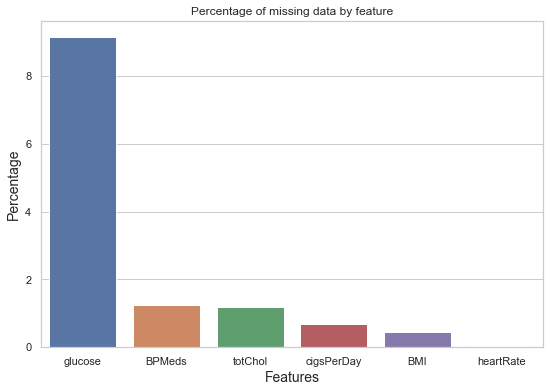

In [22]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [23]:
# drop missing entries
data.dropna(axis=0, inplace=True)

In [24]:
data.shape

(3751, 15)

THIS PRINTS THE OUTLIERS

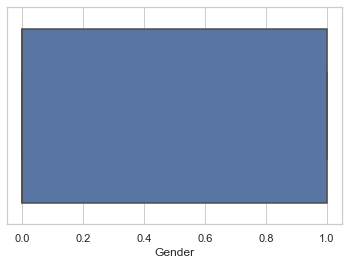

In [25]:
sns.boxplot(x=data['Gender'])

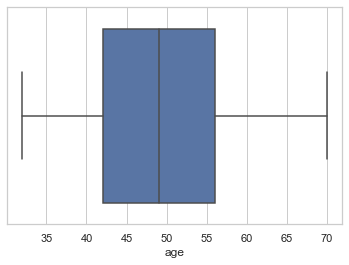

In [26]:
sns.boxplot(x=data['age'])

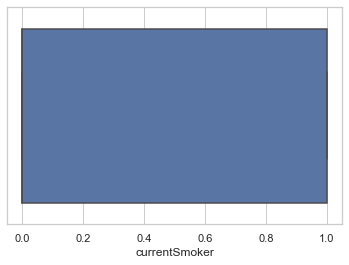

In [27]:
sns.boxplot(x=data['currentSmoker'])

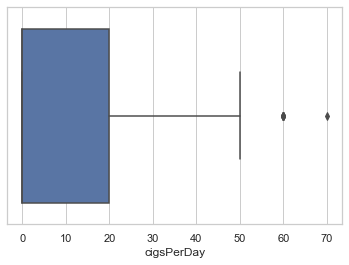

In [28]:
sns.boxplot(x=data['cigsPerDay'])

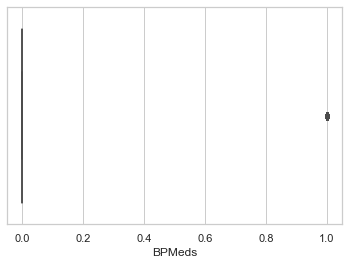

In [29]:
sns.boxplot(x=data['BPMeds'])

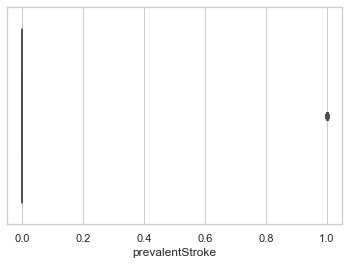

In [30]:
sns.boxplot(x=data['prevalentStroke'])

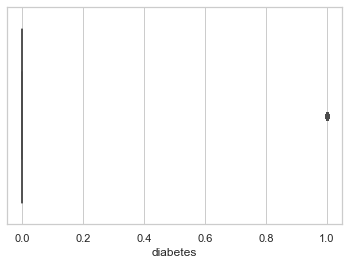

In [31]:
sns.boxplot(x=data['diabetes'])

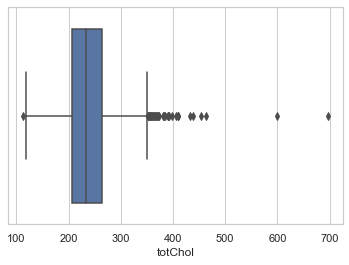

In [32]:
sns.boxplot(x=data['totChol'])

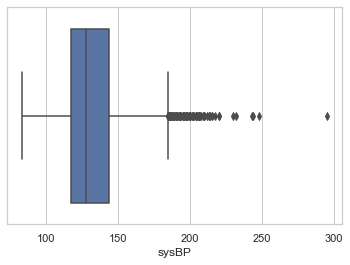

In [33]:
sns.boxplot(x=data['sysBP'])

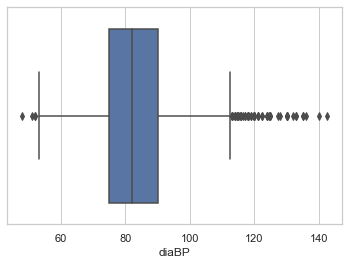

In [34]:
sns.boxplot(x=data['diaBP'])

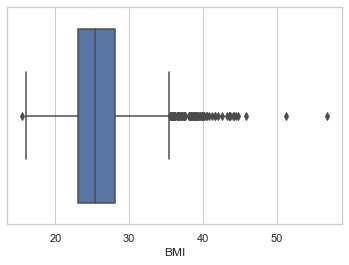

In [35]:
sns.boxplot(x=data['BMI'])

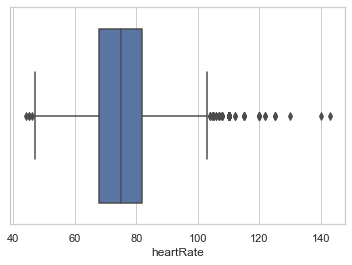

In [36]:
sns.boxplot(x=data['heartRate'])

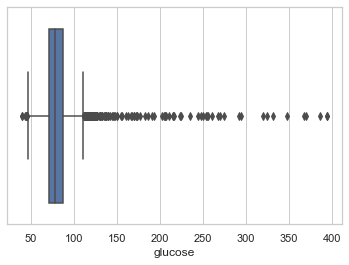

In [37]:
sns.boxplot(x=data['glucose'])

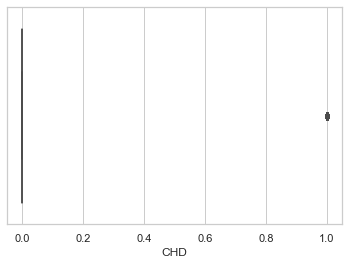

In [38]:
sns.boxplot(x=data['CHD'])

<ipython-input-39-28956f241dd2>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax = ax)


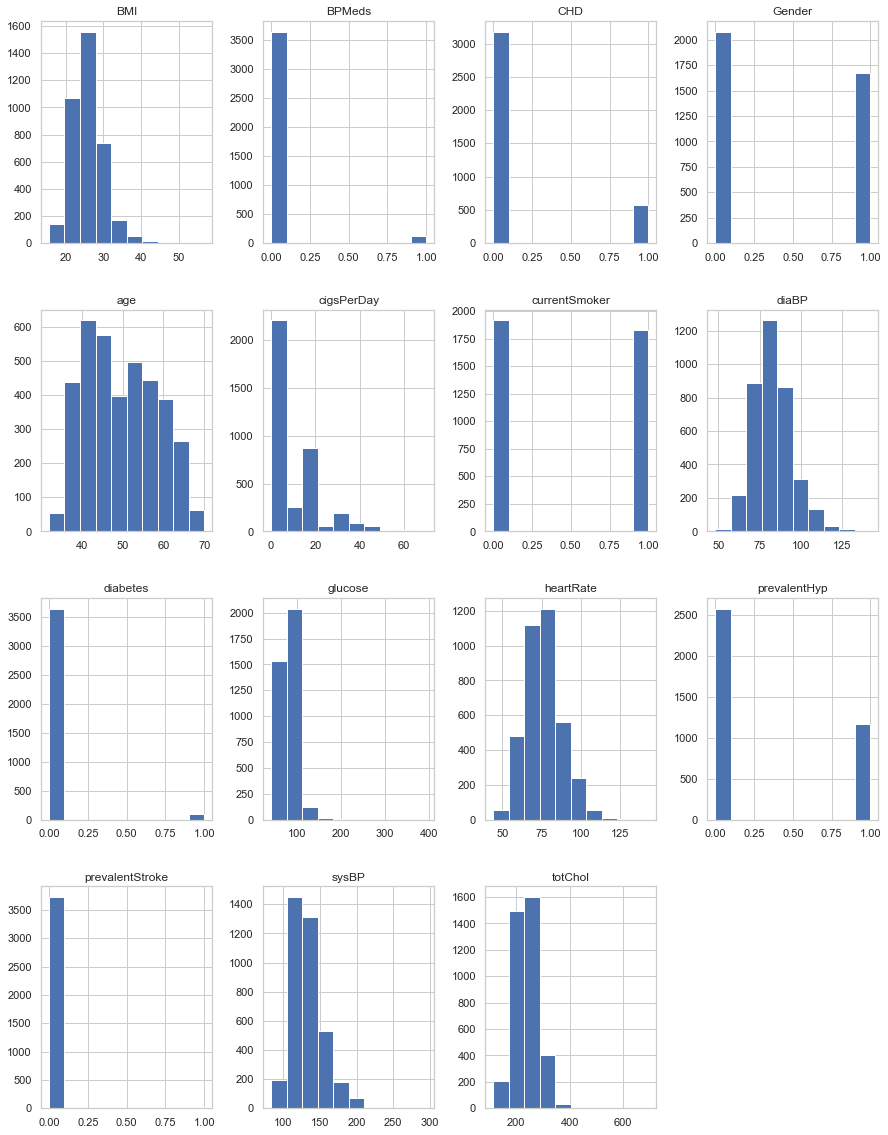

In [39]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

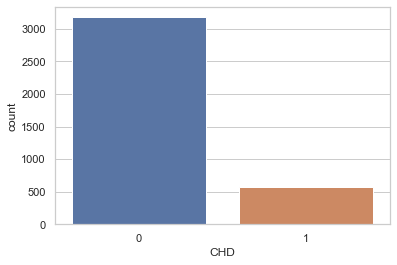

There are 3179 patients without heart disease and 572 patients with the disease


In [40]:
sns.countplot(x='CHD',data=data)
plt.show()
cases = data.CHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

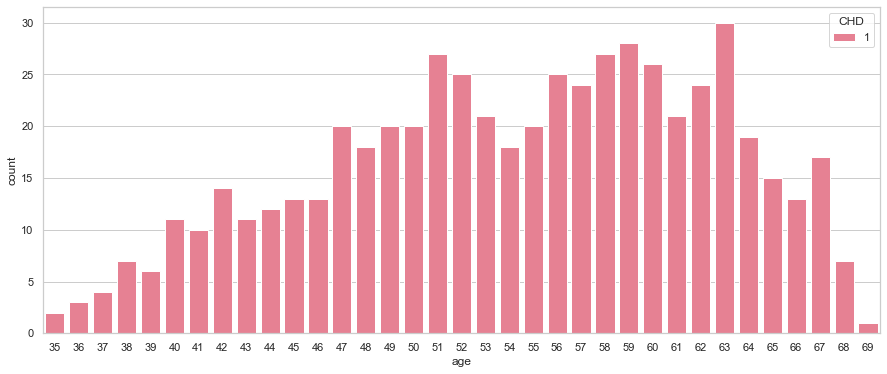

In [41]:
positive_cases = data[data['CHD'] == 1]
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = positive_cases, hue = 'CHD', palette='husl')
plt.show()

The people with the highest risk of developing CHD are betwwen the ages of 51 and 63

The number of sick people generally increases with age

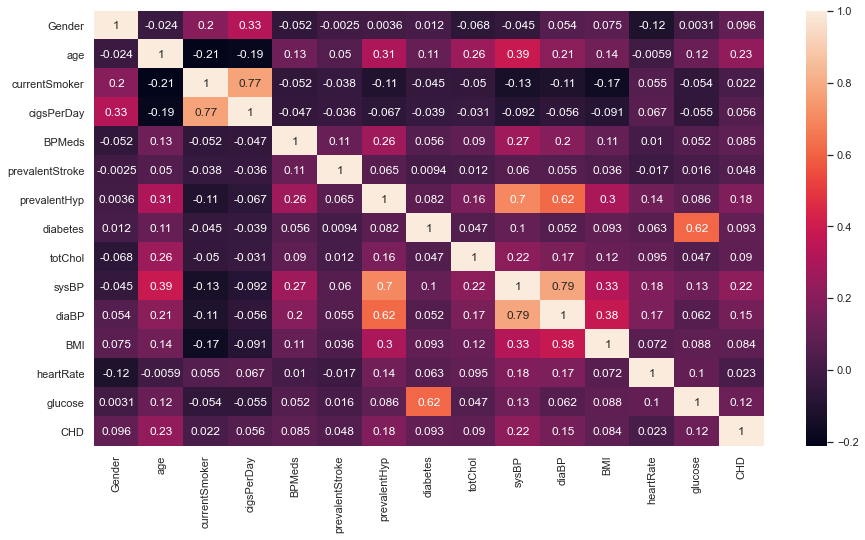

In [42]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

**The Features with the highest correlations are Age, Prevalent hypertension and Systolic blood pressure**

**Test-Train Split**

In [43]:
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score


In [44]:
X = np.asarray(data[['Gender','age', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
						'prevalentHyp','diabetes','totChol', 'sysBP','diaBP','heartRate', 'glucose']]) 
y = np.asarray(data['CHD']) 

# normalization of the datset 
X = preprocessing.StandardScaler().fit(X).transform(X) 

# Train-and-Test -Split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
		X, y, test_size = 0.4, random_state = 10) 
print ('Train set:', X_train.shape, y_train.shape) 
print ('Test set:', X_test.shape, y_test.shape) 


Train set: (2250, 12) (2250,)
Test set: (1501, 12) (1501,)


# Logistic Regression

Modeling of the Dataset | Evaluation and Accuracy :

In [45]:
logreg = LogisticRegression() 
logreg.fit(X_train, y_train) 
y_pred = logreg.predict(X_test) 

In [46]:
log_reg_accuracy = accuracy_score(y_pred, y_test) * 100
print('Accuracy Score for logistic regression is %f'%log_reg_accuracy)

Accuracy Score for logistic regression is 85.143238


In [47]:
log_train_score = logreg.score(X_train, y_train) * 100
print('Train score for Logistic Regression is %f'%log_train_score)

Train score for Logistic Regression is 85.244444


In [48]:
print('Difference between train and test score for Logistic Regression is %f'%(log_train_score - log_reg_accuracy))

Difference between train and test score for Logistic Regression is 0.101207


Cross Validation

In [49]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.848


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 Using Confusion Matrix to find the Acuuracy of the model :

In [50]:
confusion_matrix(y_pred, y_test)

array([[1262,  205],
       [  18,   16]])

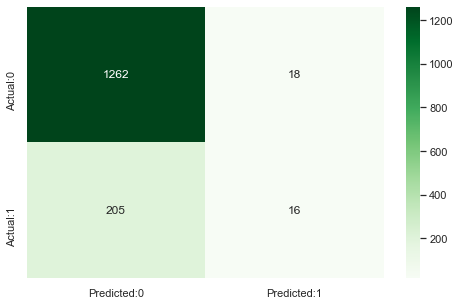

In [51]:
cm = confusion_matrix(y_test, y_pred) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") 
plt.show() 

In [52]:
print('The details for confusion matrix is =') 
print (classification_report(y_test, y_pred)) 

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1280
           1       0.47      0.07      0.13       221

    accuracy                           0.85      1501
   macro avg       0.67      0.53      0.52      1501
weighted avg       0.80      0.85      0.80      1501



# **Training and Testing the Machine Learning Model - SVM (Support Vector Machines)**

In [53]:
from sklearn import svm
from sklearn import metrics

In [54]:
X = np.asarray(data[['Gender','age', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
						'prevalentHyp','diabetes','totChol', 'sysBP','diaBP','heartRate', 'glucose']]) 
y = np.asarray(data['CHD']) 

# normalization of the datset 
X = preprocessing.StandardScaler().fit(X).transform(X) 

# Train-and-Test -Split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
		X, y, test_size = 0.4, random_state = 2) 
print ('Train set:', X_train.shape, y_train.shape) 
print ('Test set:', X_test.shape, y_test.shape) 

Train set: (2250, 12) (2250,)
Test set: (1501, 12) (1501,)


In [55]:
ml = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
ml.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = ml.predict(X_test)

In [56]:
ml.score(X_test,y_test)

0.8520986009327115

In [57]:
confusion_matrix(y_test,y_pred)

array([[1279,    0],
       [ 222,    0]])

In [64]:
import numpy as np
from sklearn.metrics import jaccard_similarity_score 
print('') 
jaccard_similarity_score(y_true, y_pred)
print('Accuracy of the model in jaccard similarity score is = ',jaccard_similarity_score(y_true, y_pred))

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

# **Random Forest Classifier**

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf_clf = RandomForestClassifier(n_estimators = 150,min_samples_split=10,random_state=0)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [67]:
rf_accuracy = accuracy_score(y_pred_rf, y_test)*100
print('Accuracy score for Random Forest is %f'%rf_accuracy)

Accuracy score for Random Forest is 84.676882


In [68]:
rf_train_score = rf_clf.score(X_train, y_train)*100
print('Train score for Random Forest is %f'%rf_train_score)

Train score for Random Forest is 92.177778


In [69]:
print('Difference between train and test scores for Random Forest is : %f'%(rf_train_score - rf_accuracy))

Difference between train and test scores for Random Forest is : 7.500896


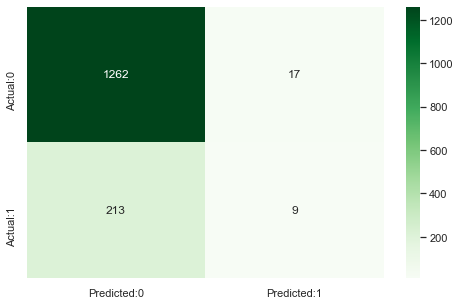

In [70]:
cm = confusion_matrix(y_test, y_pred_rf) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") 
plt.show() 

In [71]:
confusion_matrix(y_pred_rf, y_test)

array([[1262,  213],
       [  17,    9]])

In [72]:
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1475
           1       0.04      0.35      0.07        26

    accuracy                           0.85      1501
   macro avg       0.51      0.60      0.49      1501
weighted avg       0.97      0.85      0.90      1501



# **K-nearest neighbours**


In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred)) 

0.8661690215942416


In [74]:
print(X.shape)
print(y.shape)

(3751, 12)
(3751,)


In [75]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred)) 

0.8261159227181879


In [76]:
confusion_matrix(y_pred, y_test)

array([[1214,  196],
       [  65,   26]])

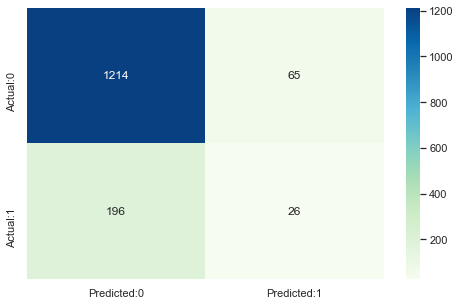

In [77]:
cm = confusion_matrix(y_test, y_pred) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "GnBu") 
plt.show() 

In [78]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1410
           1       0.12      0.29      0.17        91

    accuracy                           0.83      1501
   macro avg       0.53      0.57      0.53      1501
weighted avg       0.90      0.83      0.86      1501



KNN gives an accuracy score of 0.83 and f1 score 0.86.

# **Decision Tree**

In [79]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy",max_depth=4)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [80]:
y_pred_tree = classifier.predict(X_test)

In [81]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print('Accuracy score for decision tree is %f'%accuracy_tree)

Accuracy score for decision tree is 0.850766


In [82]:
confusion_matrix(y_pred_tree,y_test)

array([[1277,  222],
       [   2,    0]])

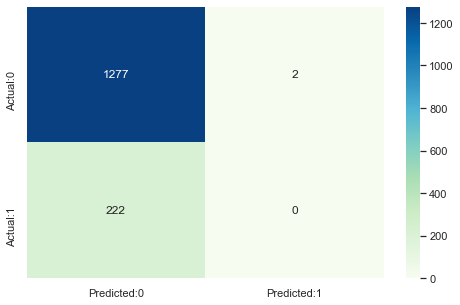

In [83]:
cm = confusion_matrix(y_test, y_pred_tree) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "GnBu") 
plt.show() 

In [84]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1279
           1       0.00      0.00      0.00       222

    accuracy                           0.85      1501
   macro avg       0.43      0.50      0.46      1501
weighted avg       0.73      0.85      0.78      1501



Desicion tree gives an accuracy score of 85% an f1-score 0.92.



# overall comparison of all the above models

1.logistic regression

cross validation average accuracy: 84.8

f1-score:0.80
    
2.Support vector machine

Accuracy of the model in jaccard similarity score is =  85.20986009327115

f1-score:0.84
    
3.Random forest classifier

Accuracy score for Random Forest is 84.676882

f1-score:0.90
    
4.K-nearest neighbour

Accuracy score for Random Forest is 82.61159227181879

f1-score:0.86
    
5.Decision tree

Accuracy score for Decision tree is 85.07

f1-score:0.78

**Conclusion:**
Accuracy is approx 85 for all the models, so accuracy can not be a measuring tool to choose the best model.
We compare f1 score becasue the data is unevenly distributed.
From the above analysis we can conclude that Random forest classifier gives the best F1 score, its the best model.